In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# Data Preparation & Preprocessing

The target feature ( machine failure ) is in unbalance state and the goal of this work is not find solutions for this issue but only to explore and study the SSL & AL techniques , that's why we'll extract the dataset to a balanced version which we'll use on this following work.

In [65]:
data_labeled = pd.read_csv("data/labeled.csv")
data_unlabeled = pd.read_csv("data/unlabeled.csv")
columns = data_labeled.columns
data_labeled

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [66]:
print("labeledset")
print("Machine failure (from): ",np.unique(data_labeled.loc[:,"Machine failure"],return_counts=True)[1])

# number of rows to keep in majority class
count_to_extract = np.unique(data_labeled.loc[:,"Machine failure"],return_counts=True)[1][1]

# extracting from the majority class
new_data_labeled_0 = np.array(data_labeled[data_labeled.loc[:,"Machine failure"] == 0])
np.random.shuffle(new_data_labeled_0)
new_data_labeled_0 = new_data_labeled_0[0:count_to_extract]

# concatenation to get the ne dataset
new_data_labeled_1 = np.array(data_labeled[data_labeled.loc[:,"Machine failure"] == 1])
new_data_labeled = np.vstack((new_data_labeled_1,new_data_labeled_0))
data_labeled = pd.DataFrame(new_data_labeled,columns=columns)

print("Machine failure (to): ",np.unique(data_labeled.loc[:,"Machine failure"],return_counts=True)[1])

labeledset
Machine failure (from):  [134281   2148]
Machine failure (to):  [2148 2148]


In [67]:
# drop ID's columns
data_labeled = data_labeled.drop(['Product ID','id'],axis=1)
data_unlabeled = data_unlabeled.drop(['Product ID','id'],axis=1)

# one hot to categorial features
data_labeled = pd.get_dummies(data_labeled,columns=['Type'])
data_unlabeled = pd.get_dummies(data_unlabeled,columns=['Type'])
data_labeled

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,303.9,312.8,1345,56.5,21,1,0,0,0,0,0,0,1,0
1,302.5,310.4,1307,54.8,174,1,0,1,0,0,0,0,1,0
2,300.7,309.7,1878,27.9,20,1,0,0,0,0,0,0,0,1
3,297.3,308.6,1258,61.8,144,1,0,0,0,1,0,0,1,0
4,303.0,311.3,1341,51.0,174,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,298.4,308.2,1512,43.8,94,0,0,0,0,0,0,0,0,1
4292,300.7,310.8,2119,18.8,80,0,0,0,0,0,0,1,0,0
4293,300.8,312.4,1634,31.1,173,0,0,0,0,0,0,0,1,0
4294,298.7,309.7,1649,32.3,6,0,0,0,0,0,0,0,1,0


In [68]:
# normalization min-max to a column
def normalize_min_max(column):
    return (column - column.min()) / (column.max() - column.min())

# to all dataset
data_labeled = data_labeled.apply(normalize_min_max)
data_unlabeled = data_unlabeled.apply(normalize_min_max)
data = pd.concat((data_labeled,data_unlabeled),ignore_index=True)
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0.943182,0.894737,0.096188,0.723901,0.083004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.784091,0.578947,0.0739,0.700549,0.687747,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.579545,0.486842,0.408798,0.331044,0.079051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.193182,0.342105,0.045161,0.796703,0.56917,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.840909,0.697368,0.093842,0.648352,0.687747,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95245,0.769231,0.703704,0.183935,0.502747,0.059289,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95246,0.285714,0.506173,0.217695,0.412088,0.12253,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95247,0.032967,0.061728,0.19383,0.516484,0.73913,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95248,0.307692,0.259259,0.213038,0.501374,0.272727,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
# extracting inputs data and target feature

inputs = data.drop('Machine failure',axis=1)
# update type of columns ( all to float64)
for col in inputs.columns:
    inputs[col] = inputs[col].astype('float32')

target = data.loc[:,'Machine failure']

After this step of preprocessing we get a complete dataset with a target column labeled at 4.5% (4296 rows with labels and 90954 without)

# 1. Semi-Supervised Learning SSL

## 1.1 Self training (pseudo-labeling)

this technique amounts to considering the predictions made by the model on unlabeled data as new labels which the model can use to refine its learning.

In [71]:
###################################################################

#Fonctions

# return the labeled / unlabeled data and also the labeled target column
def labeled_unlabeled_split(data,target):
    labeled_data = data[target.isna() == False] 
    unlabeled_data = data[target.isna()]
    
    return labeled_data,unlabeled_data,target[target.isna() == False]

###################################################################

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

inputs_labeled , inputs_unlabeled , target_labeled = labeled_unlabeled_split(inputs,target)
target_labeled = target_labeled.astype(int)

In [11]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(inputs_labeled,target_labeled)

best_params = grid_search.best_params_

In [12]:
# first step 

# fiting the model with the dataset labeled
best_tree_model = DecisionTreeClassifier(**best_params)
best_tree_model.fit(inputs_labeled,target_labeled)
prediction_labeled = best_tree_model.predict(inputs_labeled)
confidence_score = accuracy_score(prediction_labeled, target_labeled)
print(confidence_score)

0.9245810055865922


In [13]:
# second step

# if the confidence score is higher than a supposed threshold we can annotate the unlabeled dataset
prediction_unlabeled = best_tree_model.predict(inputs_unlabeled)

In [14]:
# third step

# create a complete dataset et evaluate it
new_target = np.hstack((target_labeled,prediction_unlabeled))

# in order to keep the order of samples and their matches on the target column
new_inputs = np.vstack((inputs_labeled , inputs_unlabeled))

In [15]:
# fourth step

# evaluation
model = LogisticRegression()
model.fit(new_inputs,new_target)
y_pred = model.predict(new_inputs)
accuracy = accuracy_score(new_target, y_pred)
print("accuracy : ",accuracy)

accuracy :  0.9608503937007874


## 1.2 Co-training

In order to obtain a more robust and less biased final solution, this strategy implements a first model, called the teacher, whose role is to generate the pseudo-labels which will be used to train the second model, called the student. Once the latter has been trained, the teacher model can be modified by taking inspiration from the student, and again generate pseudo-labels.

Processus : 
- 1- **Initializing models**: starting with two (or more) training models, each trained with a different portion of the available data. 

- 2- **Selection of confidential examples**: Models are used to classify unlabeled data. Examples where the models strongly disagree (i.e., give different predictions) are considered “confidential.” 

- 3- **Partial labeling**: Confidential examples are added to the labeled dataset, but with only the labels provided by a model for each example. 

- 4 - **Updating the models**: The models are then re-trained on the extended dataset (initial labeled data + partially labeled confidential examples).

- 5- **Iteration**: Steps 2 to 4 are repeated several times. With each iteration, the models become more and more efficient and the confidential examples gradually become fully labeled. 

Co-training exploits the assumption that if two models disagree on a prediction for a particular example, the likelihood that they could both be wrong is relatively small. By using the conflicting predictions of two models, co-training can actually improve overall performance by using the advantages of each model to compensate for the weaknesses of the other. This approach is often used for classification tasks where data is abundant but labels are expensive to obtain. However, the success of co-training depends on several factors, including model diversity, selection of relevant confidential examples, and convergence of the iterative training process.

##### Initializing models

In [94]:
def reorganize_data(inputs_labeled,target_labeled,se=42):    
    # get a list of a shuffled indexes
    indexes = np.arange(inputs_labeled.shape[0])
    np.random.seed(se)
    np.random.shuffle(indexes)
    set_size = inputs_labeled.shape[0] // 2

    # get two different sets of data for each of models
    inputs_labeled_1 = inputs_labeled.iloc[indexes[:set_size],:]
    target_labeled_1 = target_labeled.iloc[indexes[:set_size]]

    inputs_labeled_2 = inputs_labeled.iloc[indexes[set_size:],:] 
    target_labeled_2 = target_labeled.iloc[indexes[set_size:]] 
    
    return inputs_labeled_1 , target_labeled_1 , inputs_labeled_2 , target_labeled_2

In [95]:
inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2 = reorganize_data(inputs_labeled,target_labeled)

In [96]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(inputs_labeled_1,target_labeled_1)

best_params = grid_search.best_params_

teacher = DecisionTreeClassifier(**best_params)
teacher.fit(inputs_labeled_1,target_labeled_1)

# classify unlabeled data
teacher_prediction_labeled = teacher.predict(inputs_unlabeled)

In [97]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(inputs_labeled_2,target_labeled_2)

best_params = grid_search.best_params_
student = grid_search.best_estimator_

# classify unlabeled data
student_prediction_labeled = student.predict(inputs_unlabeled)

##### selection of confidential examples

In [98]:
conf_exam_indexes = np.where(teacher_prediction_labeled != student_prediction_labeled)[0]
print(f"number of confidential examples : {conf_exam_indexes.shape[0]}")
print(f"disagreement rate : {conf_exam_indexes.shape[0] / teacher_prediction_labeled.shape[0]}")

number of confidential examples : 5633
disagreement rate : 0.06193240539173648


##### Partial labeling

To choose which confidential example will be label by which model : i choose the odd one to model 1 and even one  to model 2 

In [85]:
# indexes of confidential samples by models
to_label_by_model1 = [ind for ind in conf_exam_indexes if ind%2 == 0]
to_label_by_model2 = [ind for ind in conf_exam_indexes if ind%2 != 0]

# only targets
label_conf_exam_model1 = teacher_prediction_labeled[to_label_by_model1]
label_conf_exam_model2 = student_prediction_labeled[to_label_by_model2]
target_confidential = np.hstack((label_conf_exam_model1,label_conf_exam_model2))
target_confidential = pd.DataFrame(target_confidential,columns=['Machine failure'])

# only samples
conf_samples_model1 = inputs_unlabeled.iloc[to_label_by_model1]
conf_samples_model2 = inputs_unlabeled.iloc[to_label_by_model2]
inputs_confidential = np.vstack((conf_samples_model1,conf_samples_model2))
# to a dataframe
inputs_confidential = pd.DataFrame(inputs_confidential,columns=inputs_labeled.columns)

# remove the new labeled confidential samples from the unlabeled data
ind_to_drop = conf_exam_indexes + [4296]
inputs_unlabeled.drop(ind_to_drop,inplace=True)

In [107]:
conf_exam_indexes

array([    6,    22,    30, ..., 90917, 90926, 90933])

##### Updating the models

In [89]:
# adding the confidential samples (with labeling) to the original dataset labeled
inputs_labeled_with_conf = pd.concat((inputs_labeled,inputs_confidential))
target_labeled = pd.DataFrame(target_labeled,columns=['Machine failure'])
target_labeled_with_conf = np.vstack((target_labeled,target_confidential))
target_labeled_with_conf = pd.DataFrame(target_labeled_with_conf,columns=['Machine failure'])

inputs_labeled_1_wf,target_labeled_1_wf,inputs_labeled_2_wf,target_labeled_2_wf = reorganize_data(inputs_labeled_with_conf,target_labeled_with_conf)

In [43]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(inputs_labeled_1_wf,target_labeled_1_wf)

best_params = grid_search.best_params_

teacher = DecisionTreeClassifier(**best_params)
teacher.fit(inputs_labeled_1_wf,target_labeled_1_wf)

# classify unlabeled data
teacher_prediction_labeled_wf = teacher.predict(inputs_unlabeled)

In [44]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(inputs_labeled_2_wf,target_labeled_2_wf)

best_params = grid_search.best_params_
student = grid_search.best_estimator_

# classify unlabeled data
student_prediction_labeled_wf = student.predict(inputs_unlabeled)

In [45]:
conf_exam_indexes_wf = np.where(teacher_prediction_labeled_wf != student_prediction_labeled_wf)[0]
print(f"number of confidential examples : {conf_exam_indexes_wf.shape[0]}")
print(f"disagreement rate : {conf_exam_indexes_wf.shape[0] / teacher_prediction_labeled_wf.shape[0]}")

number of confidential examples : 3670
disagreement rate : 0.04230011180138542


Number of confidential exemples will be decrease following the iterations because of the labeling we are doing.

### Functional version

In [167]:
def get_predictions_tree(inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2,inputs_unlabeled):
    param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

    tree_model = DecisionTreeClassifier()
    grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(inputs_labeled_1,target_labeled_1)

    best_params = grid_search.best_params_

    teacher = DecisionTreeClassifier(**best_params)
    teacher.fit(inputs_labeled_1,target_labeled_1)
    predi = teacher.predict(inputs_labeled_2)
    
    # classify unlabeled data
    return teacher.predict(inputs_unlabeled) , accuracy_score(target_labeled_2,predi)


def get_predictions_regression(inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2,inputs_unlabeled):
    param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
    }

    logreg = LogisticRegression()

    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

    grid_search.fit(inputs_labeled_2,target_labeled_2)

    best_params = grid_search.best_params_
    student = grid_search.best_estimator_
    predi = student.predict(inputs_labeled_1)
    

    # classify unlabeled data
    return student.predict(inputs_unlabeled) , accuracy_score(target_labeled_1,predi)



def get_confidential_samples(predictions_teacher,predictions_student,verbose=False):
    '''
        return the indexes of confidential samples
    '''
    conf_exam_indexes = np.where(predictions_teacher != predictions_student)[0]
    
    if verbose:
        print(f"number of confidential examples : {conf_exam_indexes.shape[0]}")
        print(f"disagreement rate : {conf_exam_indexes.shape[0] / predictions_student.shape[0]}")
        print()
        
    return conf_exam_indexes


def partial_labeling(conf_exam_indexes,inputs_unlabeled):
    
    # indexes of confidential samples by models
    to_label_by_model1 = [ind for ind in conf_exam_indexes if ind%2 == 0]
    to_label_by_model2 = [ind for ind in conf_exam_indexes if ind%2 != 0]

    # only targets
    label_conf_exam_model1 = teacher_prediction_labeled[to_label_by_model1]
    label_conf_exam_model2 = student_prediction_labeled[to_label_by_model2]
    target_confidential = np.hstack((label_conf_exam_model1,label_conf_exam_model2))
    target_confidential = pd.DataFrame(target_confidential,columns=['Machine failure'])

    # only samples
    conf_samples_model1 = inputs_unlabeled.iloc[to_label_by_model1]
    conf_samples_model2 = inputs_unlabeled.iloc[to_label_by_model2]
    inputs_confidential = np.vstack((conf_samples_model1,conf_samples_model2))
    # to a dataframe
    inputs_confidential = pd.DataFrame(inputs_confidential,columns=inputs_labeled.columns)

    # remove the new labeled confidential samples from the unlabeled data
    ind_to_drop = list(inputs_unlabeled.index[conf_exam_indexes])
    inputs_unlabeled.drop(ind_to_drop,inplace=True)

 
    
    return inputs_confidential,target_confidential


def updating_models(inputs_labeled,target_labeled,inputs_confidential,target_confidential):
    
    # adding the confidential samples (with labeling) to the original dataset labeled
    inputs_labeled_with_conf = pd.concat((inputs_labeled,inputs_confidential))
    target_labeled = pd.DataFrame(target_labeled,columns=['Machine failure'])
    target_labeled_with_conf = np.vstack((target_labeled,target_confidential))
    target_labeled_with_conf = pd.DataFrame(target_labeled_with_conf,columns=['Machine failure'])

    return inputs_labeled_with_conf , target_labeled_with_conf 


def co_training(inputs_labeled,target_labeled,inputs_unlabeled,niter_max=5):
    
    acc_teacher = []
    acc_student = []
    itera = 0
    
    # initialisation 
    number_conf_exam = 0
    # shutdown condition : - unlabeled data is empty( we label all the unlabeled samples)
    #                      - there's no confidential samples so we label all the rest of data by the appropriate label                 
    while(itera != niter_max ):

        inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2 = reorganize_data(inputs_labeled,target_labeled)
        
        predictions_teacher , accu_t = get_predictions_tree(inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2,inputs_unlabeled)
        acc_teacher.append(accu_t)
        predictions_student , accu_s = get_predictions_regression(inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2,inputs_unlabeled)
        acc_student.append(accu_s)
        
        conf_exam_indexes = get_confidential_samples(predictions_teacher,predictions_student,True)
        number_conf_exam = conf_exam_indexes.shape[0]
        
        delta_index = inputs_labeled.shape[0]
        
        inputs_confidential , target_confidential = partial_labeling(conf_exam_indexes,inputs_unlabeled)

        new_inputs_labeled , new_target_labeled = updating_models(inputs_labeled,target_labeled,inputs_confidential,target_confidential)
        inputs_labeled = new_inputs_labeled
        target_labeled = new_target_labeled
        itera += 1
        

    plt.plot(acc_teacher)
    plt.plot(acc_student)
    plt.show()
        
    return inputs_labeled , target_labeled


90954
number of confidential examples : 5633
disagreement rate : 0.06193240539173648

85321
number of confidential examples : 3209
disagreement rate : 0.03761090470107008

82112
number of confidential examples : 418
disagreement rate : 0.0050906079501169136

81694
number of confidential examples : 424
disagreement rate : 0.00519009964012045

81270
number of confidential examples : 39
disagreement rate : 0.00047988187523071243

81231
number of confidential examples : 179
disagreement rate : 0.0022035922246433012

81052
number of confidential examples : 78
disagreement rate : 0.0009623451611311257

80974
number of confidential examples : 210
disagreement rate : 0.0025934250500160546

80764
number of confidential examples : 405
disagreement rate : 0.005014610470011391

80359
number of confidential examples : 474
disagreement rate : 0.005898530345076469

79885
number of confidential examples : 52
disagreement rate : 0.0006509357200976403

79833
number of confidential examples : 6
disagreem

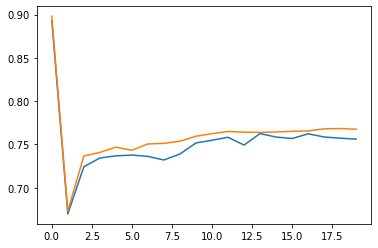

(    Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
 0              0.943182                 0.894737                0.096188   
 1              0.784091                 0.578947                0.073900   
 2              0.579545                 0.486842                0.408798   
 3              0.193182                 0.342105                0.045161   
 4              0.840909                 0.697368                0.093842   
 ..                  ...                      ...                     ...   
 0              0.945055                 0.888889                0.082654   
 1              0.274725                 0.493827                0.131548   
 2              0.934066                 0.876543                0.084983   
 3              0.945055                 0.864198                0.043073   
 4              0.472527                 0.641975                0.647264   
 
     Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  RNF  Type_H  Type_L

In [169]:
inputs_labeled , inputs_unlabeled , target_labeled = labeled_unlabeled_split(inputs,target)
target_labeled = target_labeled.astype(int)

co_training(inputs_labeled,target_labeled,inputs_unlabeled,20)

given the ease of the problem to solve we see convergence after 20 iterations. We can still modify the stopping condition and force the labeling of all the labels